**Import library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

import sklearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import warnings
warnings.simplefilter("ignore")


**Load the dataset**

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

In [ ]:
# Load dataset
def load_data():
    data =pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/processing_file2.csv", engine='python')
    return data

In [ ]:
tweet_df = load_data()
tweet_df.head()

,Unnamed: 0,UserName,label,Tweet_stemmed,Tweet_lemmatized
0,0,3799,0.0,"['menyrbi', 'philgahan', 'chrisitv', 'httpstco...","['menyrbie', 'philgahan', 'chrisitv', 'httpstc..."
1,1,3800,1.0,"['advic', 'talk', 'neighbour', 'famili', 'exch...","['advice', 'talk', 'neighbour', 'family', 'exc..."
2,2,3801,1.0,"['coronaviru', 'australia', 'woolworth', 'give...","['coronavirus', 'australia', 'woolworth', 'giv..."
3,3,3802,1.0,"['food', 'stock', 'one', 'empti', 'pleas', 'do...","['food', 'stock', 'one', 'empty', 'please', 'd..."
4,4,3803,3.0,"['readi', 'go', 'supermarket', 'covid', 'outbr...","['ready', 'go', 'supermarket', 'covid', 'outbr..."


In [ ]:
tweet_df.drop('Unnamed: 0',inplace=True,axis = 1)

In [ ]:
tweet_df.head(10)

,UserName,label,Tweet_stemmed,Tweet_lemmatized
0,3799,0.0,"['menyrbi', 'philgahan', 'chrisitv', 'httpstco...","['menyrbie', 'philgahan', 'chrisitv', 'httpstc..."
1,3800,1.0,"['advic', 'talk', 'neighbour', 'famili', 'exch...","['advice', 'talk', 'neighbour', 'family', 'exc..."
2,3801,1.0,"['coronaviru', 'australia', 'woolworth', 'give...","['coronavirus', 'australia', 'woolworth', 'giv..."
3,3802,1.0,"['food', 'stock', 'one', 'empti', 'pleas', 'do...","['food', 'stock', 'one', 'empty', 'please', 'd..."
4,3803,3.0,"['readi', 'go', 'supermarket', 'covid', 'outbr...","['ready', 'go', 'supermarket', 'covid', 'outbr..."
5,3804,1.0,"['news', 'region', 'first', 'confirm', 'covid'...","['news', 'region', 'first', 'confirmed', 'covi..."
6,3805,1.0,"['cashier', 'groceri', 'store', 'share', 'insi...","['cashier', 'grocery', 'store', 'sharing', 'in..."
7,3806,0.0,"['supermarket', 'today', 'didnt', 'buy', 'toil...","['supermarket', 'today', 'didnt', 'buy', 'toil..."
8,3807,1.0,"['due', 'covid', 'retail', 'store', 'classroom...","['due', 'covid', 'retail', 'store', 'classroom..."
9,3809,0.0,"['month', 'hasnt', 'crowd', 'supermarket', 're...","['month', 'hasnt', 'crowding', 'supermarket', ..."


In [ ]:
tweet_df.isnull().sum()

UserName            0
label               0
Tweet_stemmed       0
Tweet_lemmatized    0
dtype: int64

In [ ]:
messages= tweet_df.copy()
messages.reset_index()

,index,UserName,label,Tweet_stemmed,Tweet_lemmatized
0,0,3799,0.0,"['menyrbi', 'philgahan', 'chrisitv', 'httpstco...","['menyrbie', 'philgahan', 'chrisitv', 'httpstc..."
1,1,3800,1.0,"['advic', 'talk', 'neighbour', 'famili', 'exch...","['advice', 'talk', 'neighbour', 'family', 'exc..."
2,2,3801,1.0,"['coronaviru', 'australia', 'woolworth', 'give...","['coronavirus', 'australia', 'woolworth', 'giv..."
3,3,3802,1.0,"['food', 'stock', 'one', 'empti', 'pleas', 'do...","['food', 'stock', 'one', 'empty', 'please', 'd..."
4,4,3803,3.0,"['readi', 'go', 'supermarket', 'covid', 'outbr...","['ready', 'go', 'supermarket', 'covid', 'outbr..."
...,...,...,...,...,...
31231,31231,44950,2.0,"['mrsilverscott', 'definit', 'man', 'feel', 'l...","['mrsilverscott', 'definitely', 'man', 'feel',..."
31232,31232,44951,0.0,"['airlin', 'pilot', 'offer', 'stock', 'superma...","['airline', 'pilot', 'offering', 'stock', 'sup..."
31233,31233,44952,3.0,"['respons', 'complaint', 'provid', 'cite', 'co...","['response', 'complaint', 'provided', 'citing'..."
31234,31234,44953,1.0,"['know', 'get', 'tough', 'kameronwild', 'ratio...","['know', 'getting', 'tough', 'kameronwilds', '..."


**No gram approach**

In [ ]:
tfidf_biagram = TfidfVectorizer(sublinear_tf=True,
                            analyzer='word',
                            lowercase = False,
                            ngram_range=(1, 1),
                            max_features=27000)

In [ ]:
X_biagram = tfidf_biagram.fit_transform(messages['Tweet_lemmatized'])
X_biagram

<31236x27000 sparse matrix of type '<class 'numpy.float64'>'
	with 509417 stored elements in Compressed Sparse Row format>

In [ ]:
Y_biagram = messages['label']

In [ ]:
Y_biagram.shape,X_biagram.shape

((31236,), (31236, 27000))

**Normalize the data**

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
Scall_x= scaler.fit_transform(X_biagram)
Scall_x

<31236x27000 sparse matrix of type '<class 'numpy.float64'>'
	with 509417 stored elements in Compressed Sparse Row format>

In [ ]:
smk_biagram = SMOTETomek(random_state=42)
X_biagram_v1,Y_biagram_v1=smk_biagram.fit_sample(Scall_x,Y_biagram)

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y_biagram)))
print('Resampled dataset shape {}'.format(Counter(Y_biagram_v1)))

Original dataset shape Counter({1.0: 11421, 0.0: 7711, 2.0: 6624, 3.0: 5480})
Resampled dataset shape Counter({3.0: 11408, 2.0: 11346, 0.0: 11331, 1.0: 11275})


**Spliting dataset**

In [ ]:
x_train_biagram,x_test_biagram,y_train_biagram,y_test_biagram = train_test_split(X_biagram_v1,Y_biagram_v1,test_size = 0.30, random_state= True)

**Confusion matrix**

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Support Vector Machine**

SVM  Algo
              precision    recall  f1-score   support

         0.0       0.38      0.99      0.55      3422
         1.0       0.81      0.11      0.20      3397
         2.0       0.92      0.53      0.68      3332
         3.0       0.99      0.69      0.82      3457

    accuracy                           0.58     13608
   macro avg       0.78      0.58      0.56     13608
weighted avg       0.77      0.58      0.56     13608

Accuracy Score: 0.5836272780717225
Confusion matrix, without normalization


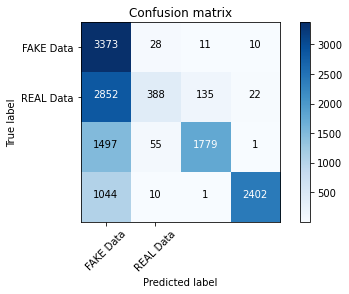

In [ ]:
# SVM
import sklearn.metrics as metrics
import itertools
svm_class_biagram = svm.SVC(kernel='poly')
svm_class_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_svm = svm_class_biagram.predict(x_test_biagram)
predictions_svm = svm_class_biagram.predict(x_test_biagram)
print("SVM  Algo")
print(classification_report(y_test_biagram, y_pred_svm))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_svm))

#Confusion matrix
cm_svm = metrics.confusion_matrix(y_test_biagram, y_pred_svm)
plot_confusion_matrix(cm_svm, classes=['FAKE Data', 'REAL Data'])

**Decission Tree Classifier**

Decission Tree Classifier
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.69      3422
         1.0       0.51      0.49      0.50      3397
         2.0       0.68      0.66      0.67      3332
         3.0       0.82      0.78      0.80      3457

    accuracy                           0.66     13608
   macro avg       0.67      0.66      0.66     13608
weighted avg       0.67      0.66      0.66     13608

Accuracy Score: 0.6649029982363316
Confusion matrix, without normalization


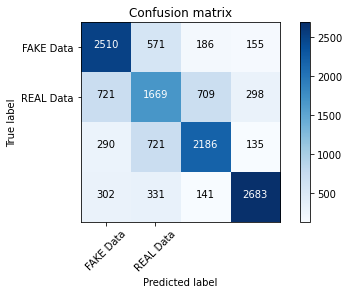

In [ ]:
# Decission Tree Classifier
decession_tree_biagram = DecisionTreeClassifier()
decession_tree_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_decession_tree_biagram = decession_tree_biagram.predict(x_test_biagram)
predictions_dt = decession_tree_biagram.predict(x_test_biagram)
print("Decission Tree Classifier")
print(classification_report(y_test_biagram, y_pred_decession_tree_biagram))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_dt))

#Confusion matrix
cm_dtc = metrics.confusion_matrix(y_test_biagram, y_pred_decession_tree_biagram)
plot_confusion_matrix(cm_dtc, classes=['FAKE Data', 'REAL Data'])

**Random Forest Classifier**

Random Forest  Classifier
              precision    recall  f1-score   support

         0.0       0.71      0.89      0.79      3422
         1.0       0.65      0.55      0.60      3397
         2.0       0.81      0.77      0.79      3332
         3.0       0.91      0.87      0.89      3457

    accuracy                           0.77     13608
   macro avg       0.77      0.77      0.77     13608
weighted avg       0.77      0.77      0.77     13608

Accuracy Score: 0.7694738389182834
Confusion matrix, without normalization


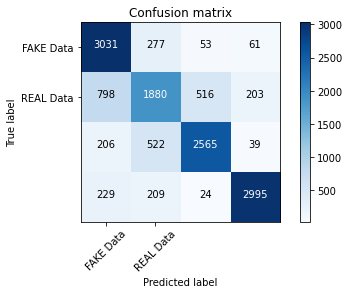

In [ ]:

# Random Forest  Classifier
random_forest_biagram = RandomForestClassifier()
random_forest_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_random_forest_biagram = random_forest_biagram.predict(x_test_biagram)

predictions_rf = random_forest_biagram.predict(x_test_biagram)
print("Random Forest  Classifier")
print(classification_report(y_test_biagram, y_pred_random_forest_biagram))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_rf))

#Confusion matrix
cm_rf = metrics.confusion_matrix(y_test_biagram, y_pred_random_forest_biagram)
plot_confusion_matrix(cm_rf, classes=['FAKE Data', 'REAL Data'])

**KNN**

KNN  Algo
              precision    recall  f1-score   support

         0.0       0.35      0.92      0.51      3422
         1.0       0.93      0.02      0.04      3397
         2.0       0.61      0.58      0.59      3332
         3.0       0.98      0.42      0.58      3457

    accuracy                           0.48     13608
   macro avg       0.72      0.48      0.43     13608
weighted avg       0.72      0.48      0.43     13608

Accuracy Score: 0.48324514991181655
Confusion matrix, without normalization


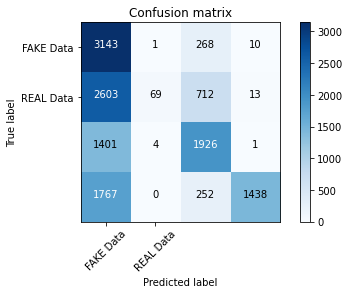

In [ ]:

# KNN  Algorithm
knn_classifier_biagram = KNeighborsClassifier()
knn_classifier_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_knn_classifier_bigram = knn_classifier_biagram.predict(x_test_biagram)
predictions_knn = knn_classifier_biagram.predict(x_test_biagram)
print("KNN  Algo")
print(classification_report(y_test_biagram, y_pred_knn_classifier_bigram))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_knn))

#Confusion matrix
cm_knn = metrics.confusion_matrix(y_test_biagram, y_pred_knn_classifier_bigram)
plot_confusion_matrix(cm_knn, classes=['FAKE Data', 'REAL Data'])

**Gradient boosting**

GradientBosting  Algo
              precision    recall  f1-score   support

         0.0       0.61      0.84      0.70      3422
         1.0       0.53      0.46      0.49      3397
         2.0       0.75      0.67      0.71      3332
         3.0       0.87      0.76      0.81      3457

    accuracy                           0.68     13608
   macro avg       0.69      0.68      0.68     13608
weighted avg       0.69      0.68      0.68     13608

Accuracy Score: 0.6815843621399177
Confusion matrix, without normalization


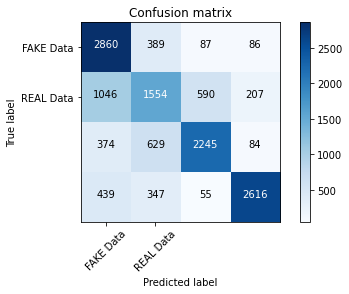

In [ ]:
# Gradient bossting
gradient_bossting_biagram  = GradientBoostingClassifier(random_state=3)
gradient_bossting_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_gradientbossting = gradient_bossting_biagram.predict(x_test_biagram)
#predictions_gb = gradient_bossting_biagram.predict(x_test_biagram)
print("GradientBosting  Algo")
print(classification_report(y_test_biagram, y_pred_gradientbossting))
print('Accuracy Score:',accuracy_score(y_test_biagram, y_pred_gradientbossting))

#Confusion matrix
cm_gb = metrics.confusion_matrix(y_test_biagram, y_pred_gradientbossting)
plot_confusion_matrix(cm_gb, classes=['FAKE Data', 'REAL Data'])

**Multinomial Naive Bayes**

Multinomial Naive Bias
              precision    recall  f1-score   support

         0.0       0.80      0.62      0.70      3422
         1.0       0.53      0.50      0.51      3397
         2.0       0.66      0.78      0.71      3332
         3.0       0.81      0.91      0.86      3457

    accuracy                           0.70     13608
   macro avg       0.70      0.70      0.70     13608
weighted avg       0.70      0.70      0.70     13608

Accuracy Score: 0.7006172839506173
Confusion matrix, without normalization


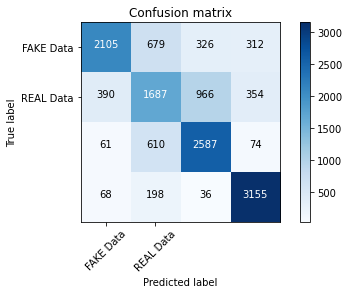

In [ ]:
# Multinomial Naive Bias
mulNB_biagram  = MultinomialNB()
mulNB_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_mulNB_biagram = mulNB_biagram.predict(x_test_biagram)
predictions_mnb = mulNB_biagram.predict(x_test_biagram)
print("Multinomial Naive Bias")
print(classification_report(y_test_biagram, y_pred_mulNB_biagram))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_mnb))

#Confusion matrix
cm_mnb = metrics.confusion_matrix(y_test_biagram, y_pred_mulNB_biagram)
plot_confusion_matrix(cm_mnb, classes=['FAKE Data', 'REAL Data'])

**Logistic Regression**

Logistic Reg  Algo
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81      3422
         1.0       0.66      0.57      0.61      3397
         2.0       0.77      0.77      0.77      3332
         3.0       0.94      0.91      0.92      3457

    accuracy                           0.78     13608
   macro avg       0.78      0.78      0.78     13608
weighted avg       0.78      0.78      0.78     13608

Accuracy Score: 0.7829218106995884
Confusion matrix, without normalization


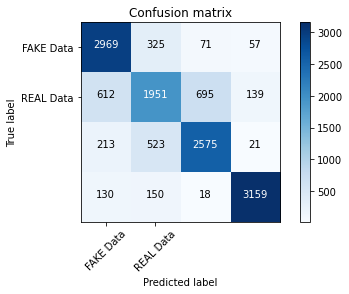

In [ ]:
# Logistic Regression
logis_reg_bia =LogisticRegression()
logis_reg_bia.fit(x_train_biagram,y_train_biagram)
y_pred_log = logis_reg_bia.predict(x_test_biagram)
predictions_lr = logis_reg_bia.predict(x_test_biagram)
print("Logistic Reg  Algo")
print(classification_report(y_test_biagram, y_pred_log))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_lr))

#Confusion matrix
cm_lr = metrics.confusion_matrix(y_test_biagram, y_pred_log)
plot_confusion_matrix(cm_lr, classes=['FAKE Data', 'REAL Data'])

**Passive Aggressive Classifier Algorithm**

accuracy:   0.746
Confusion matrix, without normalization


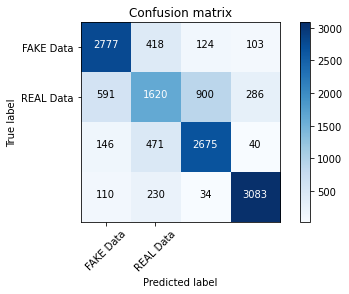

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt 
from sklearn import metrics
import numpy as np
import itertools
linear_clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
linear_clf.fit(x_train_biagram, y_train_biagram)
pred = linear_clf.predict(x_test_biagram)
score = metrics.accuracy_score(y_test_biagram, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test_biagram, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


**Multinomial Classifier with Hyperparameter**

In [ ]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train_biagram,y_train_biagram)
    y_pred=sub_classifier.predict(x_test_biagram)
    score = metrics.accuracy_score(y_test_biagram, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.6832745443856555
Alpha: 0.1, Score : 0.6993680188124632
Alpha: 0.2, Score : 0.7003233392122281
Alpha: 0.30000000000000004, Score : 0.7031893004115226
Alpha: 0.4, Score : 0.7035567313345091
Alpha: 0.5, Score : 0.7031893004115226
Alpha: 0.6000000000000001, Score : 0.7026014109347443
Alpha: 0.7000000000000001, Score : 0.7015726043503822
Alpha: 0.8, Score : 0.7016460905349794
Alpha: 0.9, Score : 0.7013521457965902


**Hyperparameters tune**

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import GridSearchCV

# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,10,20],
#             'kernel': ['rbf','linear']
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [1,5,10]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10]
#         }
#     },
#     'naive_bayes_gaussian': {
#         'model': GaussianNB(),
#         'params': {}
#     },
#     'naive_bayes_multinomial': {
#         'model': MultinomialNB(),
#         'params': {}
#     },
#     'decision_tree': {
#         'model': DecisionTreeClassifier(),
#         'params': {
#             'criterion': ['gini','entropy'],
            
#         }
#     }     
# }

In [ ]:
# scores = []

# for model_name, mp in model_params.items():
#     clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(x_train_biagram, y_train_biagram)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

**Adaptive boosting on Best algorithm**

In [33]:
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
logis_reg_bia_ada=LogisticRegression()

# Create adaboost classifer object
abcSV =AdaBoostClassifier(n_estimators=100, base_estimator=logis_reg_bia_ada,learning_rate=5)
modelSVC = abcSV.fit(x_train_biagram, y_train_biagram)
predictionsSVM = modelSVC.predict(x_test_biagram)

print('Classification Report:\n',classification_report(y_test_biagram, predictionsSVM))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictionsSVM))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3422
         1.0       0.25      1.00      0.40      3397
         2.0       0.00      0.00      0.00      3332
         3.0       0.00      0.00      0.00      3457

    accuracy                           0.25     13608
   macro avg       0.06      0.25      0.10     13608
weighted avg       0.06      0.25      0.10     13608

Accuracy Score: 0.24963256907701353


**Cross validiation on Logistic Regression**

In [36]:
from sklearn.model_selection import cross_validate
cv_lr= cross_validate(logis_reg_bia, x_train_biagram, y_train_biagram, cv=10)
print(cv_lr['test_score'])
print(cv_lr['test_score'].mean())

[0.76826196 0.77676322 0.77700787 0.77669291 0.76598425 0.76535433
 0.76661417 0.77165354 0.7615748  0.77417323]
0.7704080307027114


In [38]:
model_score= pd.DataFrame(cv_lr)
model_score

,fit_time,score_time,test_score
0,4.785725,0.002520,0.768262
1,4.815030,0.002570,0.776763
2,4.838032,0.002586,0.777008
3,4.906658,0.002508,0.776693
4,4.877633,0.002520,0.765984
5,4.919498,0.002551,0.765354
6,4.920919,0.002544,0.766614
7,4.922561,0.002506,0.771654
8,5.107489,0.003124,0.761575
9,4.973290,0.002601,0.774173


In [ ]:
ax= model_score.plot.line()

**ROC-AUC CURVE**

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve